# Lecture 2 - Playing around with classical bits and quantum bits aka qubits

## What is a classical bit?
In classical computers, information is represented as the binary digits 0 or 1. The word document you read or video you watchis encoded in the computer binary language in terms of these 1’s and 0’s. Computer hardware understands the 1-bit as an electrical current flowing through a wire (in a transistor) while the 0-bitis the absence of an electrical current in a wire. These electrical signals can be thought of as “on” (the 1-bit) or “off” (the 0-bit). Your computer then decodes the classical 1 or 0 bits into words orvideos, etc.

## What is a quantum bit? - Qubit
Quantum bits, called qubits, are similar to bits in that there are two measurable states called the 0 and 1 states. However, unlike classical bits, qubits can also be in a superposition state (lecture 1) of these 0 and 1 states. 

### Dirac or bra-ket notation 
This is not the usual way one introduces a quantum state. However, Dirac notation is the most simplest way to understand and visualise a quantum state. A simple one qubit state is represented as

$
\ket{\Psi} = \alpha \ket{0} + \beta \ket{1}
$

Here $\alpha$ and $\beta$ are amplitude of the states. 

![My Plot](Figures/State_with_amplitude.png)

**Amplitudes** are very important because they tell us the probability of finding the particle in that specific state when performing a measurement. The probability of measuring the particle in state $\ket{0}$ is $|\alpha|^2$ (which is nothing but $\alpha \times \alpha^*$, where $\alpha^*$ is the conjugate of $\alpha$), and that in the state $\ket{1}$ is $|\beta|^2$. Since the total probability of observing all the states of the quantum system must add up to 100%, the amplitudes must follow this rule:

$
|\alpha|^2 + |\beta|^2 = 1
$

This is called a **normalization** rule. The coefficients $\alpha$ and $\beta$ can always be rescaled by some factor to normalize the quantum state.

A qubit is like the position of the hour hand on a clock — it can point in any direction, not just “on” or “off” like a classical bit.

To help us visualise this idea, we use something called the Bloch Sphere. It’s an abstract but useful way to represent all possible qubit states.

The Bloch sphere has some similarities with the unit circle from trigonometry, which you might have seen before — except now we’re thinking in 3D. We’ll use it as a visual tool to build intuition about what a qubit can be.

The full mathematical details are beyond the scope of this lecture — but don’t worry! You only need a feel for what’s going on for now.

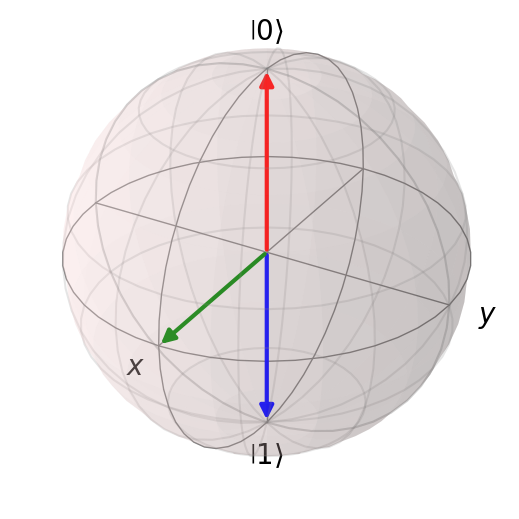

In [6]:
from qutip import basis, Bloch
import numpy as np

# Define states
ket_0 = basis(2, 0)                       # |0⟩
ket_1 = basis(2, 1)                       # |1⟩
plus_state = (ket_0 + ket_1).unit()      # (|0⟩ + |1⟩)/√2

# Create Bloch sphere
b = Bloch()
b.vector_color = ['r', 'b', 'g']  # Red = |0⟩, Blue = |1⟩, Green = superposition
b.add_states([ket_0, ket_1, plus_state])
b.show()

Red = $\ket{0}$

Blue = $\ket{1}$

Green: (equal superposition) = $\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})$

In [13]:
import numpy as np
from qutip import basis, Bloch, Qobj
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Function to build a qubit state given θ and φ
def qubit_state(theta, phi):
    # Convert degrees to radians
    theta_rad = np.radians(theta)
    phi_rad = np.radians(phi)
    # Construct the qubit state
    state = np.cos(theta_rad / 2) * basis(2, 0) + np.exp(1j * phi_rad) * np.sin(theta_rad / 2) * basis(2, 1)
    return state.unit()

# Function to update Bloch sphere plot
def plot_bloch(theta=0, phi=0):
    state = qubit_state(theta, phi)
    b = Bloch()
    b.vector_color = ['purple']
    b.add_states([state])
    b.show()

# Create interactive widget
interact(plot_bloch, 
         theta=widgets.FloatSlider(value=0, min=0, max=180, step=1, description='θ (deg)'),
         phi=widgets.FloatSlider(value=0, min=0, max=360, step=1, description='φ (deg)'));


interactive(children=(FloatSlider(value=0.0, description='θ (deg)', max=180.0, step=1.0), FloatSlider(value=0.…

### Intuitive and mathematical understanding of this notation
Do you know vectors and how they can be repersented as matrices

Say for example $\vec{F} = 3 \hat{i} + 4 \hat{j}$ can be expressed as a matrix for the ease of understanding as
$
\vec{F} = \begin{pmatrix}
3 \\
4
\end{pmatrix}
$

In quantum mechanics, we call these state vectors kets. A ket is written like this: $\ket{\psi}$. This is just a fancy way of writing a column vector.

$
\ket{\Psi} =\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}
$

Thus exactly same as $\ket{\Psi} = \alpha \ket{0} + \beta \ket{1}$

This means that $\ket{0} = \begin{pmatrix}
1 \\
0
\end{pmatrix}$ and $\ket{1} = \begin{pmatrix}
0 \\
1
\end{pmatrix}$ 

A bra is just the row version of a ket. It’s written as $\bra{\psi}$.

$
\bra{\psi} = \begin{pmatrix}
\alpha^* & \beta^* \\
\end{pmatrix}
$

This is basically the conjugate transpose of the $\ket{\psi}$

## Measuring Quantum States
A particle is in a superposition of states until you measure a property of the particle. When you measure a property of a particle, the particle collapses into one of the observable states. Next let us consider what happens when a quantum state is measured, focusing on a simple type of measurement known as a standard basis measurement. 

**Snippet from last week's class**

![My Plot](Figures/after_measurement.png)
Here, we see that untill the box was opened, the state of the system was a superposition of dead and alive cat. Is the state normalised? If not what should be the factor that should goes in front of the state (according to the normalization rule)?

However, once we open it, the state of the system is *collapsed* to a classical state (either alive or dead-Not both)
This means that when you measure a property of a particle, the particle collapses into one of the observable states.

### Inner Product 
Let us look into some simple math to calculate something called the inner product. 

Let’s start with a familiar example:

Do you know dot product? The dot product of two vectors tells us how aligned they are. if the vectors are pointing in the same direction, the dot product is big.

Inner Product in Quantum Mechanics is a similar concept. As shown above $\ket{\psi}$ is a coloumn vector and $\bra{\psi}$ is a row vector. 

To measure overlap, we write: $\bra{\psi} \ket{\psi}$

- It gives a complex number, which helps us compute probabilities.
- If the result is zero, then the states are orthogonal (totally different).

Use I-pad to illustrate an example.

### Quick Questions to check understanding
1. The quantum state of a spinning coin can be written as a superposition of heads and tails.
Using heads as $\ket{1}$ and tails as $\ket{0}$, the quantum state of the coin is

$
\ket{coin} = \frac{1}{\sqrt{2}}(\ket{1}+\ket{0})
$

What is the probability of getting heads?

2. A weighted coin has twice the probability of landing on heads vs. tails. What is the state of the coin in “ket” notation?

### Measurement Basis

*What you know?*
Imagine a classical bit. You can only check if it’s 0 or 1 — the measurement ‘basis’ is fixed: the bit is either off or on.

In quantum mechanics, the measurement basis is like the question you ask the qubit. For example, you can ask
 - Is the qubit in state |0⟩ or |1⟩?’ — this is called measuring in the Z basis?
 - Or, you could ask something else, like ‘Is the qubit in state |+⟩ or |−⟩?’ — measuring in the X basis.

Different bases correspond to different ways of ‘looking’ at the qubit

Let us go back to our Bloch Sphere:


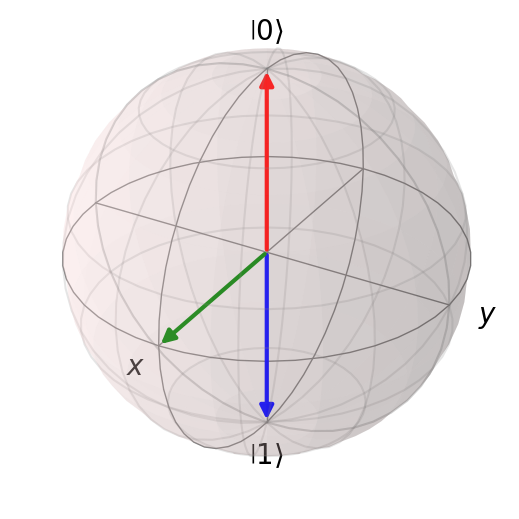

In [14]:
from qutip import basis, Bloch
import numpy as np

# Define states
ket_0 = basis(2, 0)                       # |0⟩
ket_1 = basis(2, 1)                       # |1⟩
plus_state = (ket_0 + ket_1).unit()      # (|0⟩ + |1⟩)/√2

# Create Bloch sphere
b = Bloch()
b.vector_color = ['r', 'b', 'g']  # Red = |0⟩, Blue = |1⟩, Green = superposition
b.add_states([ket_0, ket_1, plus_state])
b.show()

Measuring in the $Z$ basis checks if the point is near the north pole ($|0⟩$) or south pole ($|1⟩$). Measuring in the $X$ basis checks if the point is near the equator in one direction ($|+⟩$) or the opposite ($|−⟩$). So, which basis you measure in changes what kind of information you get from the qubit.

## A final Note 
### Physical Realization of QubitsIn a classical computer, the 0- and 1-bit mathematically represent the two allowed voltages acrossa wire in a classical circuit. Semiconductor devices called transistors are used to control whathappens to these voltages.

“What is a qubit made out of?”

As quantum computers are based on fundamentally different concepts, they must bebuilt from completely different technology; e.g., it is not possible to have a classical current ina superposition of both flowing and not flowing through a wire. Quantum computers are still intheir infancy, and so there are many different candidates for the technology to build them. Sometechnologies are based on optics, others use superconductors4 or possibly molecules. It is stillunclear if any of these are more beneficial than the others, and it is even more unclear if all futurequantum computers will be built from the same technology or if there will be many different typesof quantum computers available. 

## Things to do
1. Read about stern Gerlach experiment-Videos provided, and explain to me in next class what you understood
  - https://www.youtube.com/watch?v=PH1FbkLVJU4
  - https://www.youtube.com/watch?v=rg4Fnag4V-E

2. A quantum particle is prepared in an unknown state. It is then measured with the outcome $\ket{0}$.

   (a) Which of the following could be its initial state before the measurement: $\ket{0}$, $\frac{1}{\sqrt{10}}\ket{0}+\frac{3}{\sqrt{10}}\ket{1}$, $\ket{1}$, $\frac{1}{2}\ket{0}+\frac{\sqrt{3}}{2}\ket{1}$ ?

   (b) If you tried to measure the same particle a second time, what happens?
3.  If a qubit is exactly $\ket{0}$ what happens if you measure it in the X basis $\{\ket{+}, \ket{-}\}$? What are the probabilities?
4.  If a measurement collapses a qubit into $\ket{0}$ can you determine what the qubit state was before measurement?